In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use('bmh')
import string
from datetime import datetime

In [2]:
# read in dataframe
df_merge = pd.read_pickle('data/yelp_review1pct_business_merge.pkl')

In [3]:
# look at column info
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80220 entries, 0 to 80219
Data columns (total 12 columns):
review_id       80220 non-null object
user_id         80220 non-null object
business_id     80220 non-null object
stars_rating    80220 non-null int64
useful          80220 non-null int64
funny           80220 non-null int64
cool            80220 non-null int64
text            80220 non-null object
date            80220 non-null datetime64[ns]
num_words       80220 non-null int64
stars_avg       80220 non-null float64
sentiment       80220 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 8.0+ MB


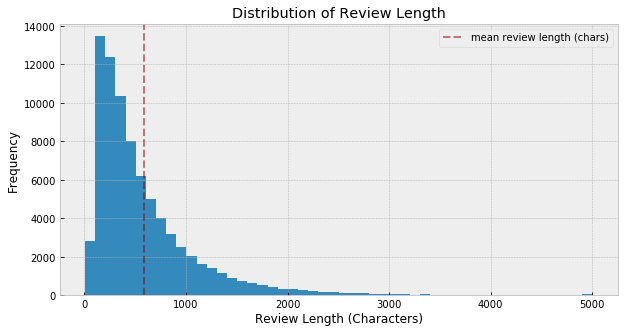

In [81]:
# what is the distribution of the length of reviews (length measured in # of chars)
plt.figure(figsize=(10,5))
_ = df_merge['num_words'].hist(bins=50)
_ = plt.axvline(df_merge.num_words.mean(), ls='--', c='darkred', alpha=0.5, label='mean review length (chars)')
_ = plt.legend()
_ = plt.title('Distribution of Review Length')
_ = plt.xlabel('Review Length (Characters)')
_ = plt.ylabel('Frequency')

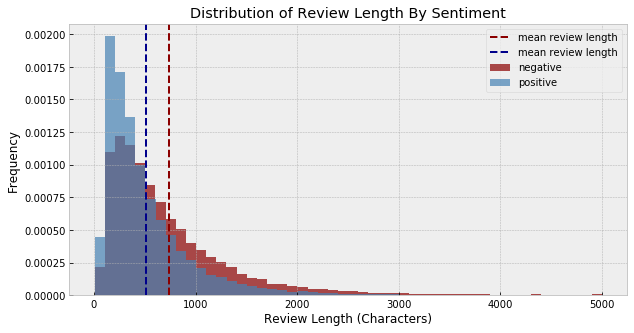

In [74]:
# Noticed some possible correlation between POS  and CLASS
# 2 color histogram plot of CLASS by POS
x0 = df_merge.loc[df_merge.sentiment==0, 'num_words']
x1 = df_merge.loc[df_merge.sentiment==1, 'num_words']
plt.figure(figsize=(10,5))
_ = plt.hist(x0, alpha=0.7, bins=50, color='darkred', density=True, stacked=True, label='negative')
_ = plt.hist(x1, alpha=0.7, bins=50, color='steelblue', density=True, stacked=True, label='positive')
_ = plt.axvline(x0.mean(), ls='--', c='darkred', label='mean review length')
_ = plt.axvline(x1.mean(), ls='--', c='darkblue', label='mean review length')
_ = plt.xlabel('Review Length (Characters)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Review Length By Sentiment')
_ = plt.legend()
plt.show()

- It looks like negative reviews tend to be a bit longer than positive reviews

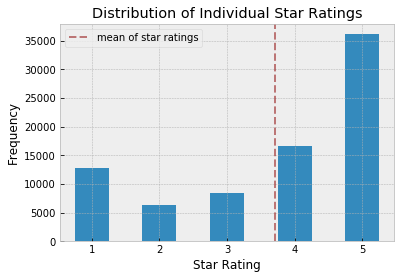

In [27]:
# Look at the distribution of user star ratings
counts = df_merge['stars_rating'].value_counts()
plt.figure(figsize=(6,4))
_ = plt.bar(counts.index, counts, width=0.5)
_ = plt.axvline(df_merge.stars_rating.mean(), ls='--', c='darkred', alpha=0.5, label='mean of star ratings')
_ = plt.legend()
_ = plt.title('Distribution of Individual Star Ratings')
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Frequency')
plt.show()

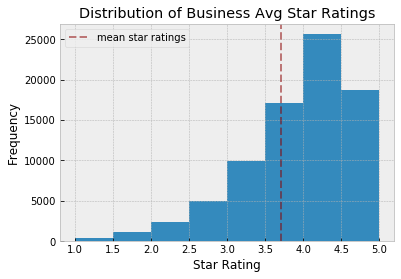

In [38]:
# look at the distribution of average star ratings (individual ratings aggregated by business, taken from business dataset)
_ = df_merge.stars_avg.hist(bins=8)
_ = plt.axvline(df_merge.stars_avg.mean(), ls='--', c='darkred', alpha=0.5, label='mean star ratings')
_ = plt.legend()
_ = plt.title('Distribution of Business Avg Star Ratings')
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Frequency')
plt.show()

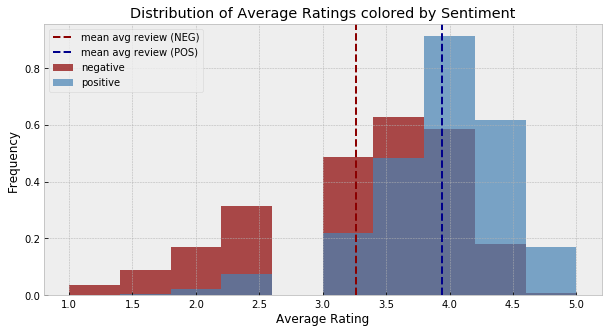

In [80]:

x0 = df_merge.loc[df_merge.sentiment==0, 'stars_avg']
x1 = df_merge.loc[df_merge.sentiment==1, 'stars_avg']
plt.figure(figsize=(10,5))
_ = plt.hist(x0, alpha=0.7,  color='darkred', density=True, stacked=True, label='negative')
_ = plt.hist(x1, alpha=0.7, color='steelblue', density=True, stacked=True, label='positive')
_ = plt.axvline(x0.mean(), ls='--', c='darkred', label='mean avg review (NEG)')
_ = plt.axvline(x1.mean(), ls='--', c='darkblue', label='mean avg review (POS)')
_ = plt.xlabel('Average Rating')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Average Ratings colored by Sentiment')
_ = plt.legend()
plt.show()

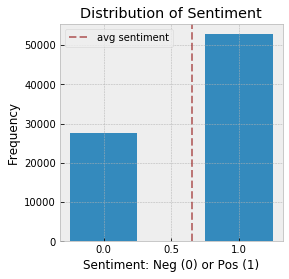

In [33]:
# look at the class balance/imbalance for our label: sentiment
counts = df_merge['sentiment'].value_counts()
plt.figure(figsize=(4,4))
_ = plt.bar(counts.index, counts, width=0.5)
_ = plt.axvline(df_merge.sentiment.mean(), ls='--', c='darkred', alpha=0.5, label='avg sentiment')
_ = plt.legend()
_ = plt.title('Distribution of Sentiment')
_ = plt.xlabel('Sentiment: Neg (0) or Pos (1)')
_ = plt.ylabel('Frequency')
_ = plt.xticks([0, 0.5, 1])
plt.show()

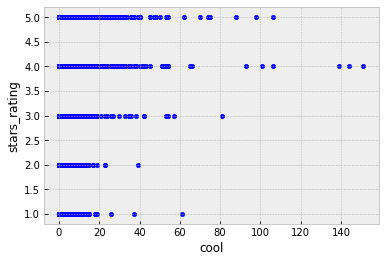

In [47]:
_ = df_merge.plot(x='cool', y='stars_rating', kind='scatter')

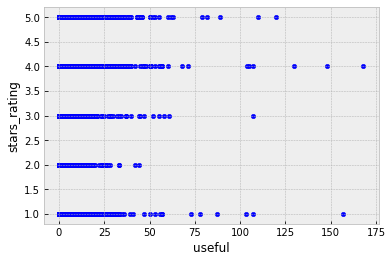

In [48]:
_ = df_merge.plot(x='useful', y='stars_rating', kind='scatter')

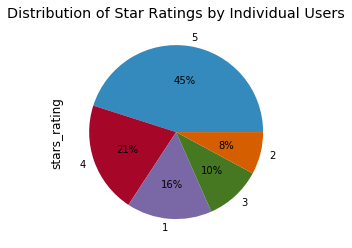

In [60]:
# Same as above, in pie chart visualization
_ = df_merge.stars_rating.value_counts().plot(kind='pie', autopct='%1.0f%%')
_ = plt.title('Distribution of Star Ratings by Individual Users')

plt.show()

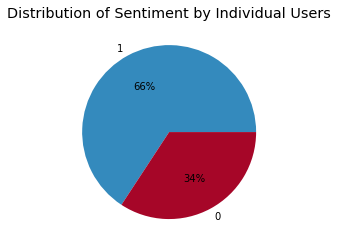

In [56]:
_ = df_merge.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
_ = plt.title('Distribution of Sentiment by Individual Users')
_ = plt.ylabel('')
plt.show()